<a href="https://colab.research.google.com/github/pulki1991/Machinelearning/blob/main/PYSPARK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Apache Spark is written in Scala programming language. To support Python with Spark, Apache Spark community released a tool, PySpark. Using PySpark, we can work with RDDs in Python programming language also. It is because of a library called Py4j that they are able to achieve this.

#Prerequisites
In addition to this, it will be very helpful, if the readers have a sound knowledge of Apache Spark, Apache Hadoop, Scala Programming Language, Hadoop Distributed File System (HDFS) and Python.

#Spark – Overview

#Apache Spark is a lightning fast real-time processing framework. It does in-memory computations to analyze data in real-time. It came into picture as Apache Hadoop MapReduce was performing batch processing only and lacked a real-time processing feature. Hence, Apache Spark was introduced as it can perform stream processing in real-time and can also take care of batch processing.

#Apart from real-time and batch processing, Apache Spark supports interactive queries and iterative algorithms also. Apache Spark has its own cluster manager, where it can host its application. It leverages Apache Hadoop for both storage and processing. It uses HDFS (Hadoop Distributed File system) for storage and it can run Spark applications on YARN as well.

#PySpark – Overview

#Apache Spark is written in Scala programming language. To support Python with Spark, Apache Spark Community released a tool, PySpark. Using PySpark, you can work with RDDs in Python programming language also. It is because of a library called Py4j that they are able to achieve this.

#PySpark offers PySpark Shell which links the Python API to the spark core and initializes the Spark context. Majority of data scientists and analytics experts today use Python because of its rich library set. Integrating Python with Spark is a boon to them.

#In this chapter, we will understand the environment setup of PySpark.

#Note − This is considering that you have Java and Scala installed on your computer.

#Let us now download and set up PySpark with the following steps.

#Step 1 − Go to the official Apache Spark download page and download the latest version of Apache Spark available there. In this tutorial, we are using spark-2.1.0-bin-hadoop2.7.

#Step 2 − Now, extract the downloaded Spark tar file. By default, it will get downloaded in Downloads directory.

#SparkContext is the entry point to any spark functionality. When we run any Spark application, a driver program starts, which has the main function and your SparkContext gets initiated here. The driver program then runs the operations inside the executors on worker nodes.

#SparkContext uses Py4J to launch a JVM and creates a JavaSparkContext. By default, PySpark has SparkContext available as ‘sc’, so creating a new SparkContext won't work.

#The following code block has the details of a PySpark class and the parameters, which a SparkContext can take.

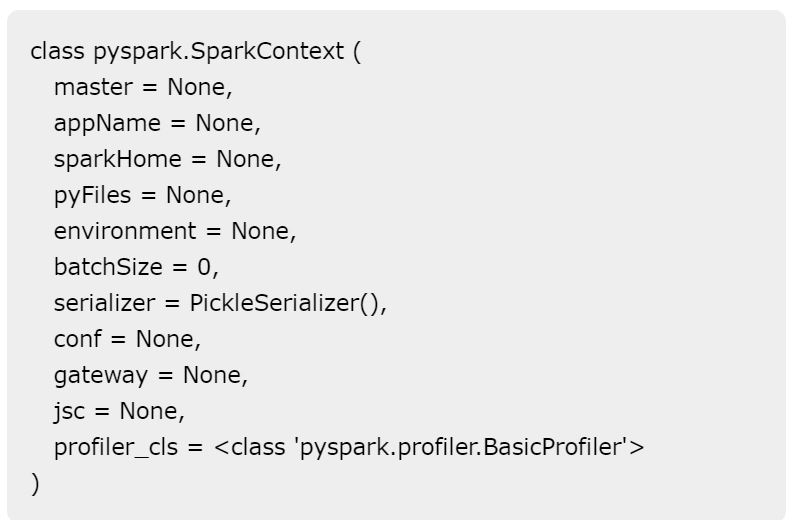

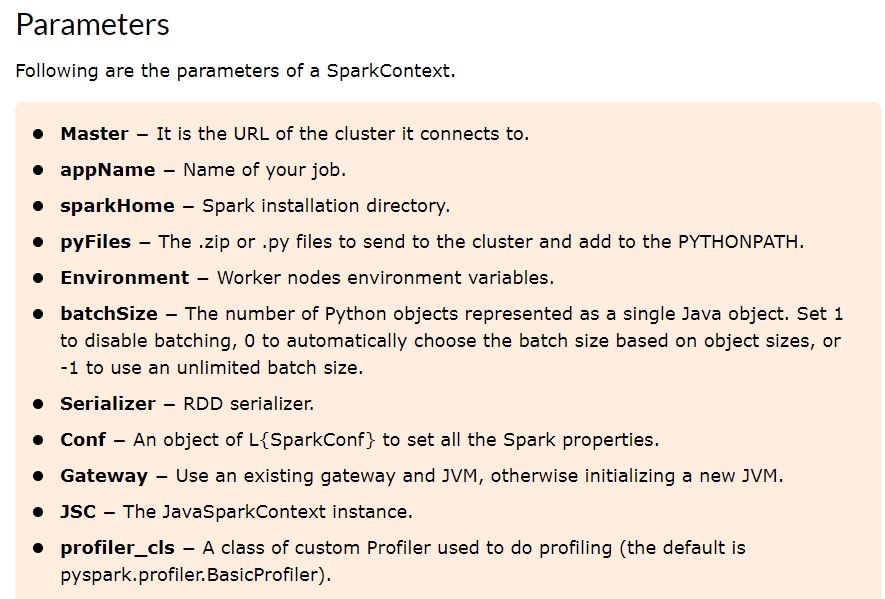

In [1]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz
!tar xf spark-3.1.1-bin-hadoop3.2.tgz
!pip install -q findspark

In [2]:
!ls

sample_data  spark-3.1.1-bin-hadoop3.2	spark-3.1.1-bin-hadoop3.2.tgz


In [3]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"

In [4]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark.conf.set("spark.sql.repl.eagerEval.enabled", True) # Property used to format output tables better
spark

In [10]:
# Downloading and preprocessing Cars Data downloaded origianlly from https://perso.telecom-paristech.fr/eagan/class/igr204/datasets
!wget https://jacobceles.github.io/knowledge_repo/colab_and_pyspark/cars.csv

--2024-03-09 05:08:05--  https://jacobceles.github.io/knowledge_repo/colab_and_pyspark/cars.csv
Resolving jacobceles.github.io (jacobceles.github.io)... 185.199.108.153, 185.199.111.153, 185.199.109.153, ...
Connecting to jacobceles.github.io (jacobceles.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://jacobcelestine.com/knowledge_repo/colab_and_pyspark/cars.csv [following]
--2024-03-09 05:08:05--  https://jacobcelestine.com/knowledge_repo/colab_and_pyspark/cars.csv
Resolving jacobcelestine.com (jacobcelestine.com)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to jacobcelestine.com (jacobcelestine.com)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22608 (22K) [text/csv]
Saving to: ‘cars.csv’

cars.csv            100%[===================>]  22.08K  --.-KB/s    in 0.001s  

2024-03-09 05:08:05 (17.2 MB/s) - ‘cars.csv’ saved [22608/22608]



In [6]:
!ls

sample_data  spark-3.1.1-bin-hadoop3.2	spark-3.1.1-bin-hadoop3.2.tgz


In [11]:
# Load data from csv to a dataframe.
# header=True means the first row is a header
# sep=';' means the column are seperated using ''
df = spark.read.csv('cars.csv', header=True, sep=";")
df.show(5)

+--------------------+----+---------+------------+----------+------+------------+-----+------+
|                 Car| MPG|Cylinders|Displacement|Horsepower|Weight|Acceleration|Model|Origin|
+--------------------+----+---------+------------+----------+------+------------+-----+------+
|Chevrolet Chevell...|18.0|        8|       307.0|     130.0| 3504.|        12.0|   70|    US|
|   Buick Skylark 320|15.0|        8|       350.0|     165.0| 3693.|        11.5|   70|    US|
|  Plymouth Satellite|18.0|        8|       318.0|     150.0| 3436.|        11.0|   70|    US|
|       AMC Rebel SST|16.0|        8|       304.0|     150.0| 3433.|        12.0|   70|    US|
|         Ford Torino|17.0|        8|       302.0|     140.0| 3449.|        10.5|   70|    US|
+--------------------+----+---------+------------+----------+------+------------+-----+------+
only showing top 5 rows



In [12]:
df.printSchema()

root
 |-- Car: string (nullable = true)
 |-- MPG: string (nullable = true)
 |-- Cylinders: string (nullable = true)
 |-- Displacement: string (nullable = true)
 |-- Horsepower: string (nullable = true)
 |-- Weight: string (nullable = true)
 |-- Acceleration: string (nullable = true)
 |-- Model: string (nullable = true)
 |-- Origin: string (nullable = true)



#The above command loads our data from into a dataframe (DF). A dataframe is a 2-dimensional labeled data structure with columns of potentially different types.

#Viewing the Dataframe

There are a couple of ways to view your dataframe(DF) in PySpark:

1.   `df.take(5)` will return a list of five Row objects.
2.   `df.collect()` will get all of the data from the entire DataFrame. Be really careful when using it, because if you have a large data set, you can easily crash the driver node.
3.   `df.show()` is the most commonly used method to view a dataframe. There are a few parameters we can pass to this method, like the number of rows and truncaiton. For example, `df.show(5, False)` or ` df.show(5, truncate=False)` will show the entire data wihtout any truncation.
4.   `df.limit(5)` will **return a new DataFrame** by taking the first n rows. As spark is distributed in nature, there is no guarantee that `df.limit()` will give you the same results each time.

Let us see some of them in action below:

In [13]:
df.show(5, truncate=False)

+-------------------------+----+---------+------------+----------+------+------------+-----+------+
|Car                      |MPG |Cylinders|Displacement|Horsepower|Weight|Acceleration|Model|Origin|
+-------------------------+----+---------+------------+----------+------+------------+-----+------+
|Chevrolet Chevelle Malibu|18.0|8        |307.0       |130.0     |3504. |12.0        |70   |US    |
|Buick Skylark 320        |15.0|8        |350.0       |165.0     |3693. |11.5        |70   |US    |
|Plymouth Satellite       |18.0|8        |318.0       |150.0     |3436. |11.0        |70   |US    |
|AMC Rebel SST            |16.0|8        |304.0       |150.0     |3433. |12.0        |70   |US    |
|Ford Torino              |17.0|8        |302.0       |140.0     |3449. |10.5        |70   |US    |
+-------------------------+----+---------+------------+----------+------+------------+-----+------+
only showing top 5 rows



In [14]:
df.show(4,False)

+-------------------------+----+---------+------------+----------+------+------------+-----+------+
|Car                      |MPG |Cylinders|Displacement|Horsepower|Weight|Acceleration|Model|Origin|
+-------------------------+----+---------+------------+----------+------+------------+-----+------+
|Chevrolet Chevelle Malibu|18.0|8        |307.0       |130.0     |3504. |12.0        |70   |US    |
|Buick Skylark 320        |15.0|8        |350.0       |165.0     |3693. |11.5        |70   |US    |
|Plymouth Satellite       |18.0|8        |318.0       |150.0     |3436. |11.0        |70   |US    |
|AMC Rebel SST            |16.0|8        |304.0       |150.0     |3433. |12.0        |70   |US    |
+-------------------------+----+---------+------------+----------+------+------------+-----+------+
only showing top 4 rows



In [15]:
df.select("Cylinders", "Displacement", "Model").show(5)

+---------+------------+-----+
|Cylinders|Displacement|Model|
+---------+------------+-----+
|        8|       307.0|   70|
|        8|       350.0|   70|
|        8|       318.0|   70|
|        8|       304.0|   70|
|        8|       302.0|   70|
+---------+------------+-----+
only showing top 5 rows



In [16]:
!wget --continue https://raw.githubusercontent.com/GarvitArya/pyspark-demo/main/sample_books.json -O /tmp/sample_books.json

--2024-03-09 05:09:05--  https://raw.githubusercontent.com/GarvitArya/pyspark-demo/main/sample_books.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1565 (1.5K) [text/plain]
Saving to: ‘/tmp/sample_books.json’

/tmp/sample_books.j 100%[===================>]   1.53K  --.-KB/s    in 0s      

2024-03-09 05:09:05 (19.6 MB/s) - ‘/tmp/sample_books.json’ saved [1565/1565]



In [17]:
!ls

cars.csv  sample_data  spark-3.1.1-bin-hadoop3.2  spark-3.1.1-bin-hadoop3.2.tgz


In [18]:
df = spark.read.json("/tmp/sample_books.json")

In [19]:
df

author,edition,price,title,year_written
"Austen, Jane",Penguin,18.2,Northanger Abbey,1814
"Tolstoy, Leo",Penguin,12.7,War and Peace,1865
"Tolstoy, Leo",Penguin,13.5,Anna Karenina,1875
"Woolf, Virginia",Harcourt Brace,25.0,Mrs. Dalloway,1925
"Cunnningham, Michael",Harcourt Brace,12.35,The Hours,1999
"Twain, Mark",Penguin,5.76,Huckleberry Finn,1865
"Dickens, Charles",Random House,5.75,Bleak House,1870
"Twain, Mark",Random House,7.75,Tom Sawyer,1862
"Woolf, Virginia",Penguin,29.0,A Room of One's Own,1922
"Rowling, J.K.",Harcourt Brace,19.95,Harry Potter,2000


#Exploratory Data Analysis with PySpark on the Books dataset

#Let’s check out its Schema:

#Before doing any slice & dice of the dataset, we should first be aware what all columns it has and its data types.

In [20]:
df.printSchema()

root
 |-- author: string (nullable = true)
 |-- edition: string (nullable = true)
 |-- price: double (nullable = true)
 |-- title: string (nullable = true)
 |-- year_written: long (nullable = true)



#Show me some Samples:

In [21]:
df.show(4,False)

+---------------+--------------+-----+----------------+------------+
|author         |edition       |price|title           |year_written|
+---------------+--------------+-----+----------------+------------+
|Austen, Jane   |Penguin       |18.2 |Northanger Abbey|1814        |
|Tolstoy, Leo   |Penguin       |12.7 |War and Peace   |1865        |
|Tolstoy, Leo   |Penguin       |13.5 |Anna Karenina   |1875        |
|Woolf, Virginia|Harcourt Brace|25.0 |Mrs. Dalloway   |1925        |
+---------------+--------------+-----+----------------+------------+
only showing top 4 rows



#How big is the Dataset:

In [22]:
df.count()

13

#Select a few columns of interest:

#1. Select the title, price, year_written

In [23]:
df.select("title", "price", "year_written").show(5)

+----------------+-----+------------+
|           title|price|year_written|
+----------------+-----+------------+
|Northanger Abbey| 18.2|        1814|
|   War and Peace| 12.7|        1865|
|   Anna Karenina| 13.5|        1875|
|   Mrs. Dalloway| 25.0|        1925|
|       The Hours|12.35|        1999|
+----------------+-----+------------+
only showing top 5 rows



#Filter the Dataset:

#How big is the Dataset:

In [24]:
df.count()

13

In [25]:
df.limit(5)

author,edition,price,title,year_written
"Austen, Jane",Penguin,18.2,Northanger Abbey,1814
"Tolstoy, Leo",Penguin,12.7,War and Peace,1865
"Tolstoy, Leo",Penguin,13.5,Anna Karenina,1875
"Woolf, Virginia",Harcourt Brace,25.0,Mrs. Dalloway,1925
"Cunnningham, Michael",Harcourt Brace,12.35,The Hours,1999


#Filter the Dataset:

# Get books that are written after 1950 & cost greater than $10

In [26]:
df_filtered = df.filter("year_written > 1950 AND price > 10 AND title IS NOT NULL")
df_filtered.select("title", "price", "year_written").show(50, False)

+-----------------------------+-----+------------+
|title                        |price|year_written|
+-----------------------------+-----+------------+
|The Hours                    |12.35|1999        |
|Harry Potter                 |19.95|2000        |
|One Hundred Years of Solitude|14.0 |1967        |
+-----------------------------+-----+------------+



#Using Pyspark SQL functions:

In [27]:
from pyspark.sql.functions import max
# Find the costliest book
maxValue = df_filtered.agg(max("price")).collect()[0][0]
print("maxValue: ",maxValue)
df_filtered.select("title","price").filter(df.price == maxValue).show(20, False)

maxValue:  19.95
+------------+-----+
|title       |price|
+------------+-----+
|Harry Potter|19.95|
+------------+-----+



# Get books that have Harry Porter in their title

In [28]:
df_filtered.select("title", "year_written").filter("title LIKE '%Harry Potter%'").distinct().show(20, False)

+------------+------------+
|title       |year_written|
+------------+------------+
|Harry Potter|2000        |
+------------+------------+



#Viewing Dataframe Columns

In [29]:
df.columns

['author', 'edition', 'price', 'title', 'year_written']

#Dataframe Schema

There are two methods commonly used to view the data types of a dataframe:

In [30]:
df.dtypes

[('author', 'string'),
 ('edition', 'string'),
 ('price', 'double'),
 ('title', 'string'),
 ('year_written', 'bigint')]

In [31]:
df.printSchema()

root
 |-- author: string (nullable = true)
 |-- edition: string (nullable = true)
 |-- price: double (nullable = true)
 |-- title: string (nullable = true)
 |-- year_written: long (nullable = true)



#Inferring Schema Implicitly

#We can use the parameter inferschema=true to infer the input schema automatically while loading the data. An example is shown below:

In [32]:
df = spark.read.csv('cars.csv', header=True, sep=";", inferSchema=True)
df.printSchema()

root
 |-- Car: string (nullable = true)
 |-- MPG: double (nullable = true)
 |-- Cylinders: integer (nullable = true)
 |-- Displacement: double (nullable = true)
 |-- Horsepower: double (nullable = true)
 |-- Weight: decimal(4,0) (nullable = true)
 |-- Acceleration: double (nullable = true)
 |-- Model: integer (nullable = true)
 |-- Origin: string (nullable = true)



#As you can see, the datatype has been infered automatically spark with even the correct precison for decimal type. A problem that might arise here is that sometimes, when you have to read multiple files with different schemas in different files, there might be an issue with implicit inferring leading to null values in some columns. Therefore, let us also see how to define schemas explicitly.

#Defining Schema Explicitly

In [33]:
from pyspark.sql.types import *
df.columns

['Car',
 'MPG',
 'Cylinders',
 'Displacement',
 'Horsepower',
 'Weight',
 'Acceleration',
 'Model',
 'Origin']

# Creating a list of the schema in the format column_name, data_type

In [34]:
# Creating a list of the schema in the format column_name, data_type
labels = [
     ('Car',StringType()),
     ('MPG',DoubleType()),
     ('Cylinders',IntegerType()),
     ('Displacement',DoubleType()),
     ('Horsepower',DoubleType()),
     ('Weight',DoubleType()),
     ('Acceleration',DoubleType()),
     ('Model',IntegerType()),
     ('Origin',StringType())
]

# Creating the schema that will be passed when reading the csv

In [35]:
schema = StructType([StructField (x[0], x[1], True) for x in labels])
schema

StructType(List(StructField(Car,StringType,true),StructField(MPG,DoubleType,true),StructField(Cylinders,IntegerType,true),StructField(Displacement,DoubleType,true),StructField(Horsepower,DoubleType,true),StructField(Weight,DoubleType,true),StructField(Acceleration,DoubleType,true),StructField(Model,IntegerType,true),StructField(Origin,StringType,true)))

In [36]:
df = spark.read.csv('cars.csv', header=True, sep=";", schema=schema)
df.printSchema()
# The schema comes as we gave!

root
 |-- Car: string (nullable = true)
 |-- MPG: double (nullable = true)
 |-- Cylinders: integer (nullable = true)
 |-- Displacement: double (nullable = true)
 |-- Horsepower: double (nullable = true)
 |-- Weight: double (nullable = true)
 |-- Acceleration: double (nullable = true)
 |-- Model: integer (nullable = true)
 |-- Origin: string (nullable = true)



In [37]:
df.show(truncate=False)

+--------------------------------+----+---------+------------+----------+------+------------+-----+------+
|Car                             |MPG |Cylinders|Displacement|Horsepower|Weight|Acceleration|Model|Origin|
+--------------------------------+----+---------+------------+----------+------+------------+-----+------+
|Chevrolet Chevelle Malibu       |18.0|8        |307.0       |130.0     |3504.0|12.0        |70   |US    |
|Buick Skylark 320               |15.0|8        |350.0       |165.0     |3693.0|11.5        |70   |US    |
|Plymouth Satellite              |18.0|8        |318.0       |150.0     |3436.0|11.0        |70   |US    |
|AMC Rebel SST                   |16.0|8        |304.0       |150.0     |3433.0|12.0        |70   |US    |
|Ford Torino                     |17.0|8        |302.0       |140.0     |3449.0|10.5        |70   |US    |
|Ford Galaxie 500                |15.0|8        |429.0       |198.0     |4341.0|10.0        |70   |US    |
|Chevrolet Impala                |14.

#As we can see here, the data has been successully loaded with the specified datatypes.

#DataFrame Operations on Columns

#We will go over the following in this section:

1.   Selecting Columns
2.   Selecting Multiple Columns
3.   Adding New Columns
4.   Renaming Columns
5.   Grouping By Columns
6.   Removing Columns


#Selecting Columns

#There are multiple ways to do a select in PySpark. You can find how they differ and how each below:

In [38]:
# 1st method
# Column name is case sensitive in this usage
print(df.Car)
print("*"*20)
df.select(df.Car).show(truncate=False)

Column<'Car'>
********************
+--------------------------------+
|Car                             |
+--------------------------------+
|Chevrolet Chevelle Malibu       |
|Buick Skylark 320               |
|Plymouth Satellite              |
|AMC Rebel SST                   |
|Ford Torino                     |
|Ford Galaxie 500                |
|Chevrolet Impala                |
|Plymouth Fury iii               |
|Pontiac Catalina                |
|AMC Ambassador DPL              |
|Citroen DS-21 Pallas            |
|Chevrolet Chevelle Concours (sw)|
|Ford Torino (sw)                |
|Plymouth Satellite (sw)         |
|AMC Rebel SST (sw)              |
|Dodge Challenger SE             |
|Plymouth 'Cuda 340              |
|Ford Mustang Boss 302           |
|Chevrolet Monte Carlo           |
|Buick Estate Wagon (sw)         |
+--------------------------------+
only showing top 20 rows



**NOTE:**

> **We can't always use the dot notation because this will break when the column names have reserved names or attributes to the data frame class. Additionally, the column names are case sensitive in nature so we need to always make sure the column names have been changed to a paticular case before using it.**

In [39]:
# 2nd method
# Column name is case insensitive here
print(df['car'])
print("*"*20)
df.select(df['car']).show(truncate=False)

Column<'car'>
********************
+--------------------------------+
|car                             |
+--------------------------------+
|Chevrolet Chevelle Malibu       |
|Buick Skylark 320               |
|Plymouth Satellite              |
|AMC Rebel SST                   |
|Ford Torino                     |
|Ford Galaxie 500                |
|Chevrolet Impala                |
|Plymouth Fury iii               |
|Pontiac Catalina                |
|AMC Ambassador DPL              |
|Citroen DS-21 Pallas            |
|Chevrolet Chevelle Concours (sw)|
|Ford Torino (sw)                |
|Plymouth Satellite (sw)         |
|AMC Rebel SST (sw)              |
|Dodge Challenger SE             |
|Plymouth 'Cuda 340              |
|Ford Mustang Boss 302           |
|Chevrolet Monte Carlo           |
|Buick Estate Wagon (sw)         |
+--------------------------------+
only showing top 20 rows



#We will take a look at three cases here:

#Adding a new column
#Adding multiple columns


In [40]:
# CASE 1: Adding a new column
# We will add a new column called 'first_column' at the end
from pyspark.sql.functions import lit
df = df.withColumn('first_column',lit(1))
# lit means literal. It populates the row with the literal value given.
# When adding static data / constant values, it is a good practice to use it.
df.show(5,truncate=False)

+-------------------------+----+---------+------------+----------+------+------------+-----+------+------------+
|Car                      |MPG |Cylinders|Displacement|Horsepower|Weight|Acceleration|Model|Origin|first_column|
+-------------------------+----+---------+------------+----------+------+------------+-----+------+------------+
|Chevrolet Chevelle Malibu|18.0|8        |307.0       |130.0     |3504.0|12.0        |70   |US    |1           |
|Buick Skylark 320        |15.0|8        |350.0       |165.0     |3693.0|11.5        |70   |US    |1           |
|Plymouth Satellite       |18.0|8        |318.0       |150.0     |3436.0|11.0        |70   |US    |1           |
|AMC Rebel SST            |16.0|8        |304.0       |150.0     |3433.0|12.0        |70   |US    |1           |
|Ford Torino              |17.0|8        |302.0       |140.0     |3449.0|10.5        |70   |US    |1           |
+-------------------------+----+---------+------------+----------+------+------------+-----+----

In [41]:
# CASE 2: Adding multiple columns
# We will add two new columns called 'second_column' and 'third_column' at the end
df = df.withColumn('second_column', lit(2)) \
       .withColumn('third_column', lit('Third Column'))
# lit means literal. It populates the row with the literal value given.
# When adding static data / constant values, it is a good practice to use it.
df.show(5,truncate=False)

+-------------------------+----+---------+------------+----------+------+------------+-----+------+------------+-------------+------------+
|Car                      |MPG |Cylinders|Displacement|Horsepower|Weight|Acceleration|Model|Origin|first_column|second_column|third_column|
+-------------------------+----+---------+------------+----------+------+------------+-----+------+------------+-------------+------------+
|Chevrolet Chevelle Malibu|18.0|8        |307.0       |130.0     |3504.0|12.0        |70   |US    |1           |2            |Third Column|
|Buick Skylark 320        |15.0|8        |350.0       |165.0     |3693.0|11.5        |70   |US    |1           |2            |Third Column|
|Plymouth Satellite       |18.0|8        |318.0       |150.0     |3436.0|11.0        |70   |US    |1           |2            |Third Column|
|AMC Rebel SST            |16.0|8        |304.0       |150.0     |3433.0|12.0        |70   |US    |1           |2            |Third Column|
|Ford Torino        

#Renaming Columns

In [42]:
#Renaming a column in PySpark
df = df.withColumnRenamed('first_column', 'new_column_one') \
       .withColumnRenamed('second_column', 'new_column_two') \
       .withColumnRenamed('third_column', 'new_column_three')
df.show(truncate=False)

+--------------------------------+----+---------+------------+----------+------+------------+-----+------+--------------+--------------+----------------+
|Car                             |MPG |Cylinders|Displacement|Horsepower|Weight|Acceleration|Model|Origin|new_column_one|new_column_two|new_column_three|
+--------------------------------+----+---------+------------+----------+------+------------+-----+------+--------------+--------------+----------------+
|Chevrolet Chevelle Malibu       |18.0|8        |307.0       |130.0     |3504.0|12.0        |70   |US    |1             |2             |Third Column    |
|Buick Skylark 320               |15.0|8        |350.0       |165.0     |3693.0|11.5        |70   |US    |1             |2             |Third Column    |
|Plymouth Satellite              |18.0|8        |318.0       |150.0     |3436.0|11.0        |70   |US    |1             |2             |Third Column    |
|AMC Rebel SST                   |16.0|8        |304.0       |150.0     |343

#Grouping By Columns

#Here, we see the Dataframe API way of grouping values. We will discuss how to:

#Group By a single column
#Group By multiple columns

In [43]:
# Group By a column in PySpark
df.groupBy('Origin').count().show(5)

+------+-----+
|Origin|count|
+------+-----+
|Europe|   73|
|    US|  254|
| Japan|   79|
+------+-----+



In [44]:
# Group By multiple columns in PySpark
df.groupBy('Origin', 'Model').count().show(5)

+------+-----+-----+
|Origin|Model|count|
+------+-----+-----+
|Europe|   71|    5|
|Europe|   80|    9|
|Europe|   79|    4|
| Japan|   75|    4|
|    US|   72|   18|
+------+-----+-----+
only showing top 5 rows



#Removing Columns

In [45]:
#Remove columns in PySpark
df = df.drop('new_column_one')
df.show(5,truncate=False)

+-------------------------+----+---------+------------+----------+------+------------+-----+------+--------------+----------------+
|Car                      |MPG |Cylinders|Displacement|Horsepower|Weight|Acceleration|Model|Origin|new_column_two|new_column_three|
+-------------------------+----+---------+------------+----------+------+------------+-----+------+--------------+----------------+
|Chevrolet Chevelle Malibu|18.0|8        |307.0       |130.0     |3504.0|12.0        |70   |US    |2             |Third Column    |
|Buick Skylark 320        |15.0|8        |350.0       |165.0     |3693.0|11.5        |70   |US    |2             |Third Column    |
|Plymouth Satellite       |18.0|8        |318.0       |150.0     |3436.0|11.0        |70   |US    |2             |Third Column    |
|AMC Rebel SST            |16.0|8        |304.0       |150.0     |3433.0|12.0        |70   |US    |2             |Third Column    |
|Ford Torino              |17.0|8        |302.0       |140.0     |3449.0|10.

#Remove multiple columnss in one go

In [46]:

df = df.drop('new_column_two') \
       .drop('new_column_three')
df.show(5,truncate=False)

+-------------------------+----+---------+------------+----------+------+------------+-----+------+
|Car                      |MPG |Cylinders|Displacement|Horsepower|Weight|Acceleration|Model|Origin|
+-------------------------+----+---------+------------+----------+------+------------+-----+------+
|Chevrolet Chevelle Malibu|18.0|8        |307.0       |130.0     |3504.0|12.0        |70   |US    |
|Buick Skylark 320        |15.0|8        |350.0       |165.0     |3693.0|11.5        |70   |US    |
|Plymouth Satellite       |18.0|8        |318.0       |150.0     |3436.0|11.0        |70   |US    |
|AMC Rebel SST            |16.0|8        |304.0       |150.0     |3433.0|12.0        |70   |US    |
|Ford Torino              |17.0|8        |302.0       |140.0     |3449.0|10.5        |70   |US    |
+-------------------------+----+---------+------------+----------+------+------------+-----+------+
only showing top 5 rows



#DataFrame Operations on Rows

#We will discuss the follwoing in this section:

#Filtering Rows

#Get Distinct Rows

#Sorting Rows

#Union Dataframes

#Filtering Rows

In [49]:
# Filtering rows in PySpark
total_count = df.count()
print("TOTAL RECORD COUNT: " + str(total_count))
europe_filtered_count = df.filter(col ('Origin')=='Europe').count()
print("EUROPE FILTERED RECORD COUNT: " + str(europe_filtered_count))
df.filter(col('Origin')=='Europe').show(truncate=False)

TOTAL RECORD COUNT: 406


NameError: name 'col' is not defined